In [2]:
import numpy as np
import matplotlib.pyplot as plt




In [3]:
def sin_wave(amp, freq, time): #진폭, hz, 시간
    return amp *np.sin(2*np.pi*freq*time)

In [6]:
time = np.arange(0,10,0.001) # 0부터 10까지 0.001의 간격으로 array 생성
sin1 = sin_wave(1, 10, time)
sin2 = sin_wave(2, 5, time)
sin3 = sin_wave(4, 1, time)


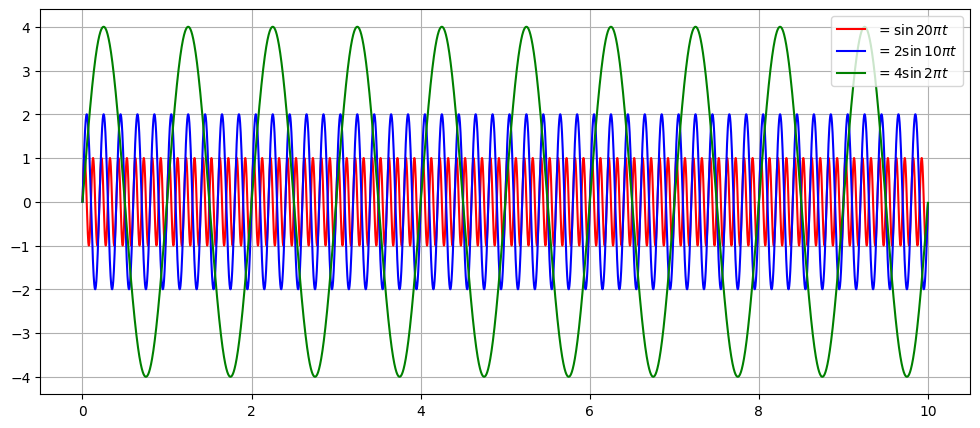

In [8]:
plt.figure(figsize=(12,5))
plt.plot(time, sin1, label=r"$=\sin {20\pi} t$", color="red")
plt.plot(time, sin2, label=r"$=2\sin {10\pi} t$", color="blue")
plt.plot(time, sin3, label=r"$=4\sin {2\pi} t$", color="green")
plt.legend() ; plt.grid() ; plt.show()

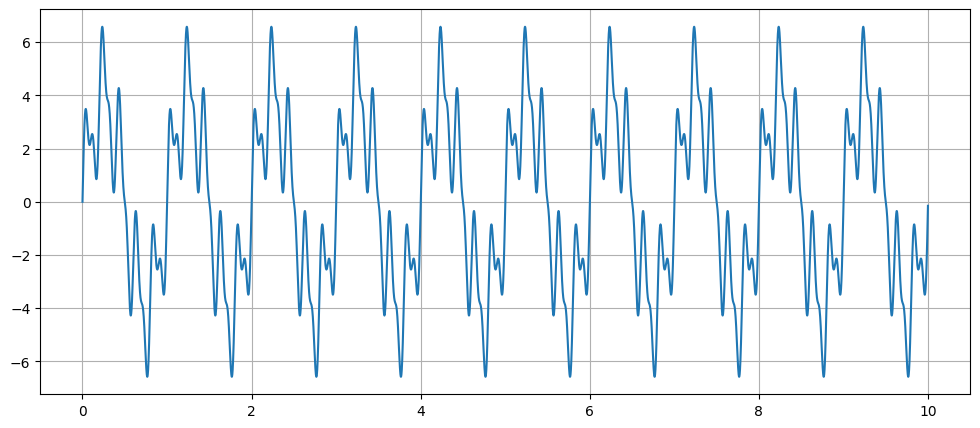

In [9]:
sin_sum = sin1 + sin2 + sin3

plt.figure(figsize=(12,5))
plt.plot(time, sin_sum)
plt.grid()
plt.show()

In [10]:
n = len(sin_sum)
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]


In [13]:
Y = np.fft.fft(sin_sum)/n
Y = Y[range(int(n/2))]

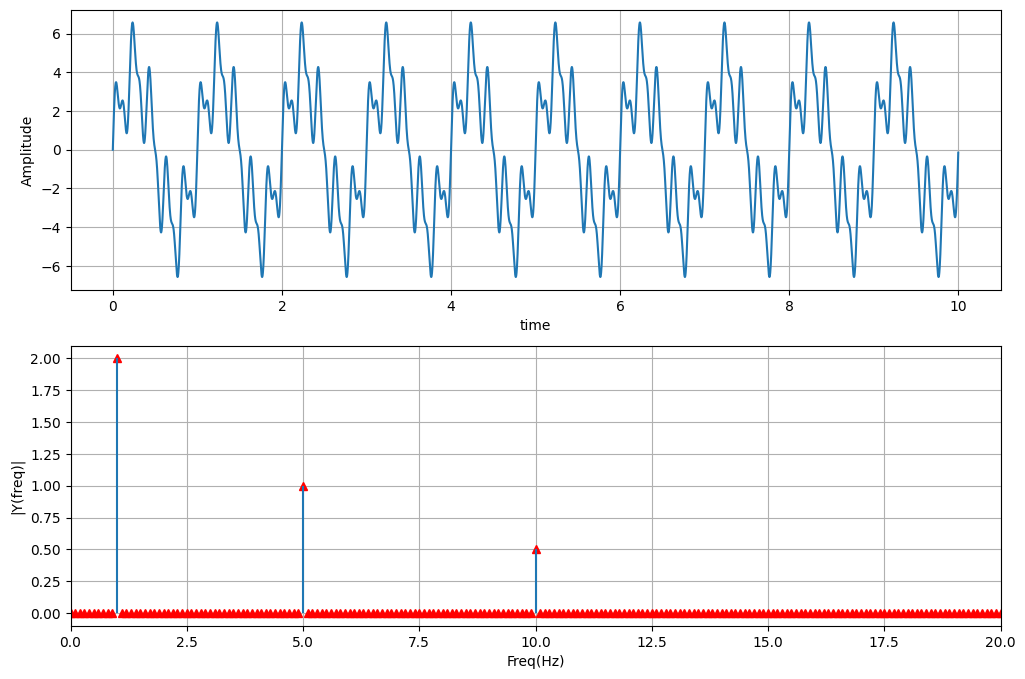

In [16]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_sum)
ax[0].set_xlabel("time")
ax[0].set_ylabel("Amplitude")
ax[0].grid(True)

ax[1].plot(freq, abs(Y), "r",linestyle=" ", marker="^")
ax[1].set_xlabel("Freq(Hz)")
ax[1].set_ylabel("|Y(freq)|")
ax[1].vlines(freq, [0],abs(Y))
ax[1].set_xlim([0,20])
ax[1].grid(True)
plt.show()


In [17]:
sin_concat = np.concatenate((sin1,sin2,sin3,sin_sum))

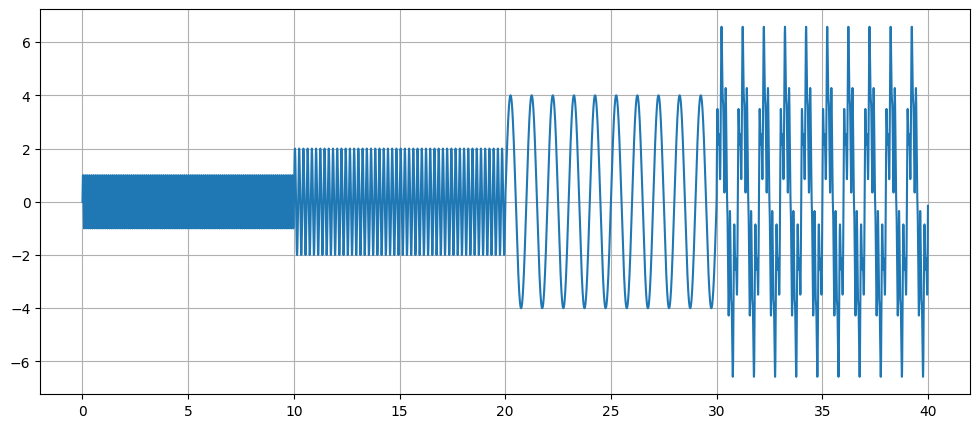

In [18]:
time = np.arange(0,40,0.001)
plt.figure(figsize=(12,5))
plt.plot(time, sin_concat)
plt.grid()
plt.show()

In [20]:
n = len(sin_concat)
k = np.arange(n)
Fs = 1/0.001
T = n/Fs
freq = k/T
freq = freq[range(int(n/2))]
Y = np.fft.fft(sin_concat)/n
Y = Y[range(int(n/2))]


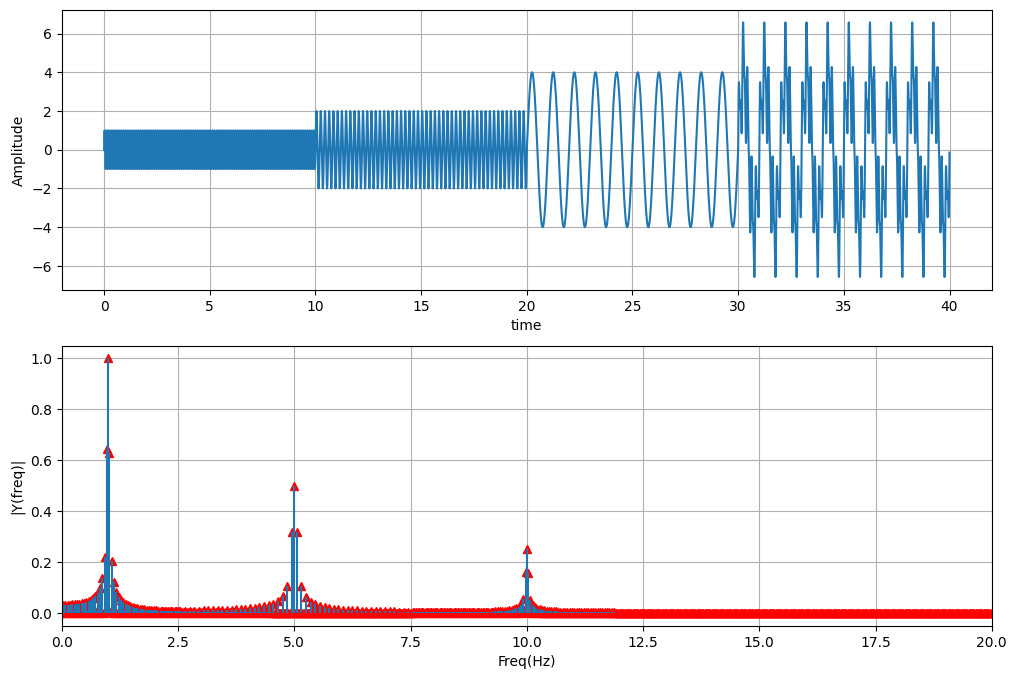

In [21]:
fig, ax = plt.subplots(2, 1, figsize=(12,8))
ax[0].plot(time, sin_concat)
ax[0].set_xlabel("time")
ax[0].set_ylabel("Amplitude")
ax[0].grid(True)

ax[1].plot(freq, abs(Y), "r",linestyle=" ", marker="^")
ax[1].set_xlabel("Freq(Hz)")
ax[1].set_ylabel("|Y(freq)|")
ax[1].vlines(freq, [0],abs(Y))
ax[1].set_xlim([0,20])
ax[1].grid(True)
plt.show()


In [22]:
def draw_stft(f, t, Zxx):
    plt.figure(figsize=(12,5))
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=1, shading="gouraud")
    plt.title("STFT Magnitude")
    plt.ylabel("Frequency [Hz]")
    plt.xlabel("Time")
    plt.ylim([0,20])
    plt.show()

In [23]:
from scipy import signal
def calc_stft(nperseg):
    f, t, Zxx = signal.stft(sin_concat, Fs, nperseg=nperseg)
    draw_stft(f, t, Zxx)

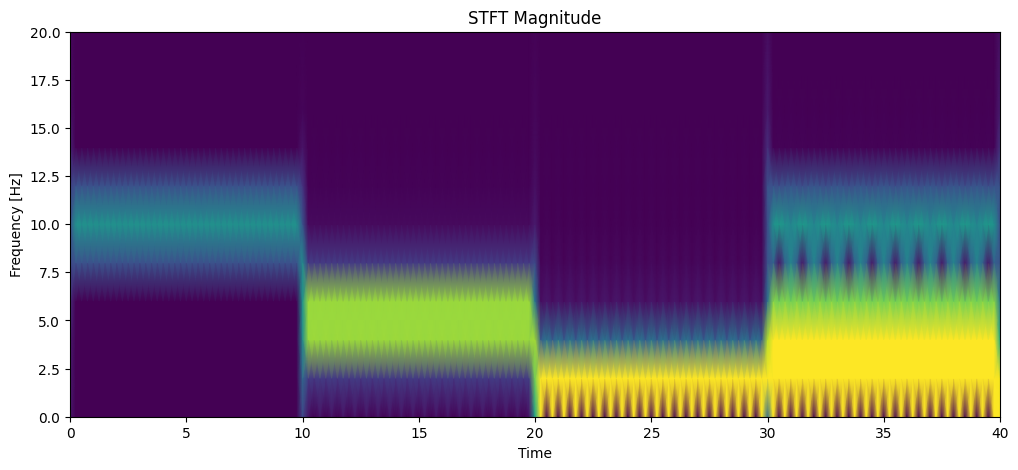

In [24]:
calc_stft(500) # 화면의 길이를 늘릴수록 신호는 선명해지나 신호의 접합면에서는 오류값이 더 많아짐
#적합한 수치를 찾는것이 중요

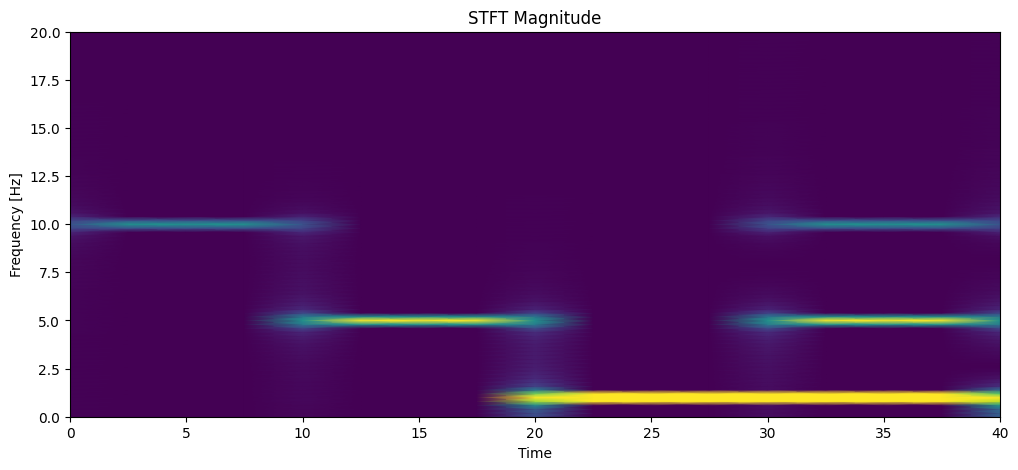

In [25]:

calc_stft(5000)

In [27]:
import librosa.display, librosa
import IPython.display
import warnings
import numpy as np

warnings.simplefilter("ignore")#경고 무시??? # 

In [ ]:
'''
def sin_wave(amp, freq, time): # 초반 함수와 겹침 아래만 실행할때 실핼할것
    return amp *np.sin(2*np.pi*freq*time)

'''

In [29]:
sr = 22*1000.
ts = 1/sr
time = np.arange(0,1,ts)
DO = sin_wave(1, 261.6256, time)
MI = sin_wave(1, 329.6276, time)
SOL = sin_wave(1, 391.9954, time)

In [30]:
IPython.display.Audio(data=DO,rate=sr)

In [46]:
sample_concat = np.concatenate((DO,MI,SOL))
sample_concat.shape

(66000,)

In [32]:
IPython.display.Audio(data=sample_concat,rate=sr)

In [33]:
sample_sum = DO + MI + SOL

In [34]:
IPython.display.Audio(data=sample_sum,rate=sr)

In [54]:
import matplotlib.pyplot as plt

def draw_wave(sample_sounds):
    plt.figure(figsize=(12,6))
    librosa.display.waveshow(y=sample_sounds, alpha=0.2, color="blue")
    plt.xlabel("time")
    plt.ylabel("Amplitude")
    plt.title("Waveform")
    plt.show()

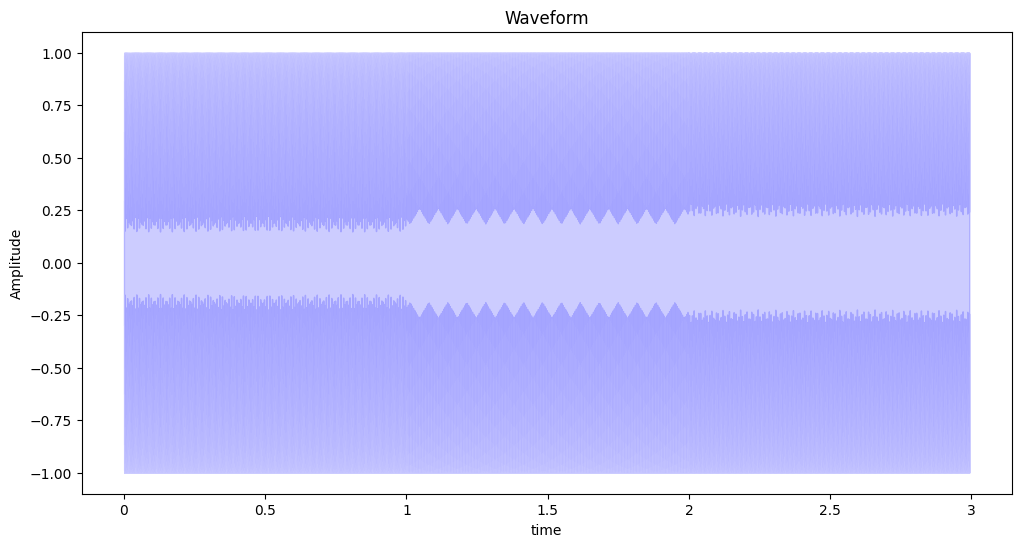

In [55]:
draw_wave(sample_concat)

In [56]:
def get_stft(sample_sounds):
    return librosa.stft(sample_sounds)

In [60]:
def draw_stft(sample_sounds, ylim=(None,None)):
    plt.figure(figsize=(12,6))
    librosa.display.specshow(np.abs(get_stft(sample_sounds)),
                             y_axis="hz",x_axis="s")
    plt.ylim(ylim)
    plt.grid()
    plt.show()


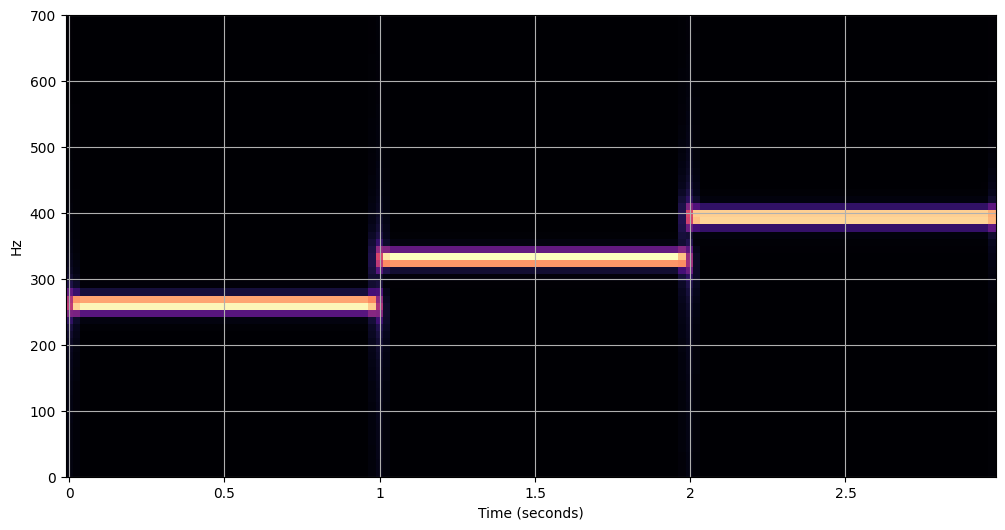

In [61]:
draw_stft(sample_concat, ylim=(0,700))

In [62]:
def get_chroma(sample_sound, sr):
    return librosa.feature.chroma_stft(S=np.abs(get_stft(sample_sound)),
                                       sr=sr)

In [63]:
def draw_chroma(sample_sounds, sr):
    plt.figure(figsize=(12,6))
    librosa.display.specshow(get_chroma(sample_sounds, sr),
                             y_axis="chroma", x_axis="time")
    plt.grid()
    plt.show()

In [74]:
piano, sr = librosa.core.load("../../data/piano.wav")
flute, sr = librosa.core.load("../../data/flute.wav")
guitar, sr = librosa.core.load("../../data/guitar.wav")
sum_music = sum([piano*2 , flute*1.2 , guitar])


In [65]:
IPython.display.Audio(data=piano, rate=sr)

In [75]:
IPython.display.Audio(data=sum_music, rate=sr)

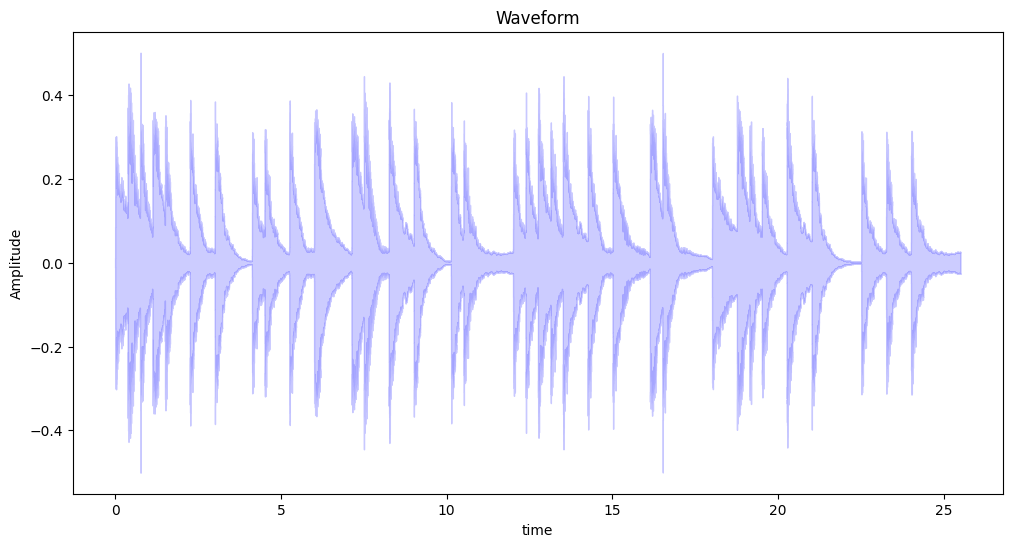

In [66]:
draw_wave(piano)

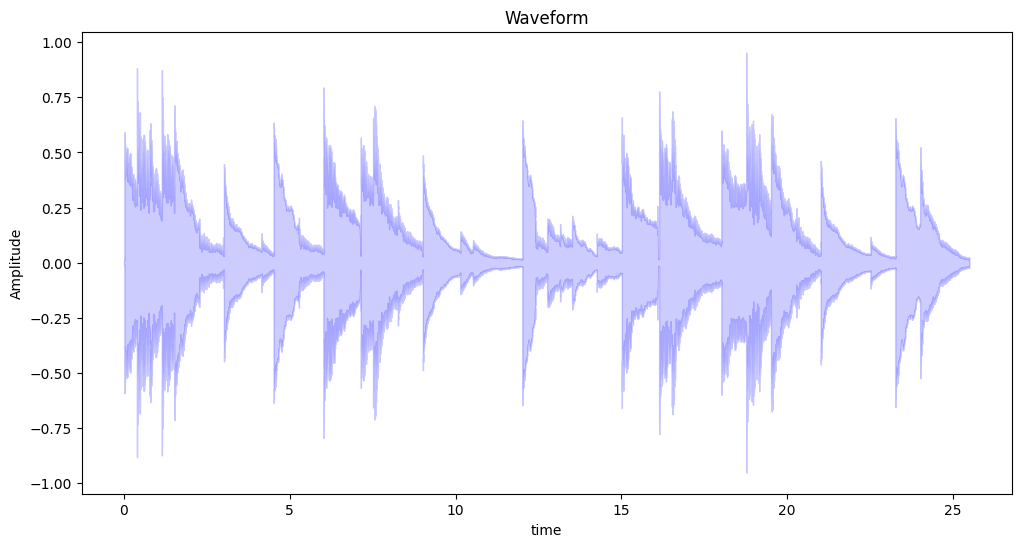

In [67]:
draw_wave(guitar)

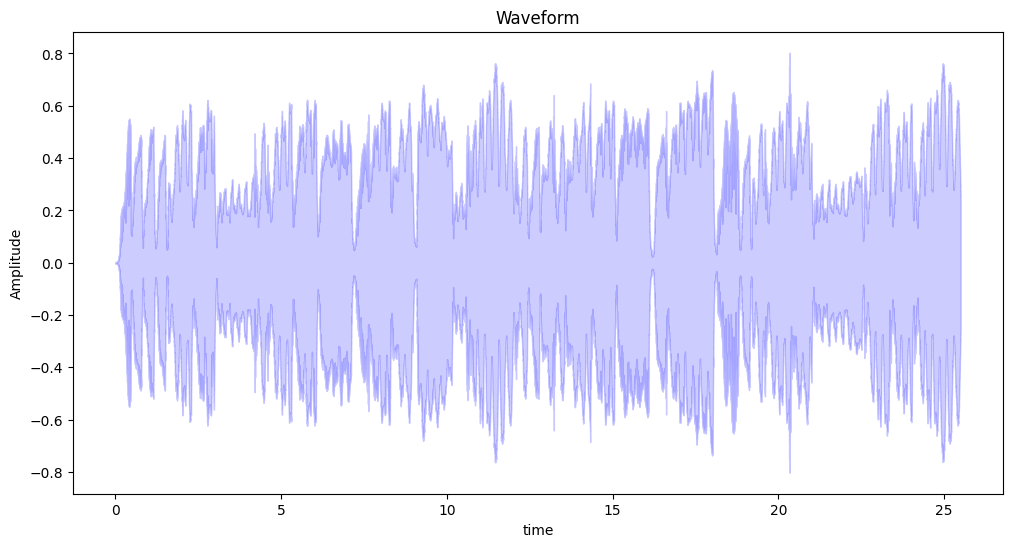

In [68]:
draw_wave(flute)

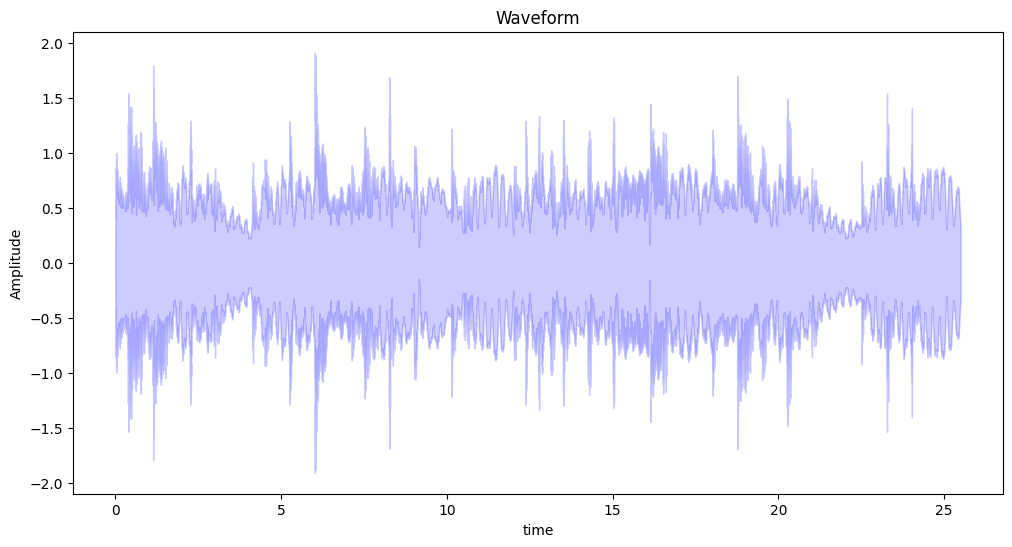

In [76]:
draw_wave(sum_music)

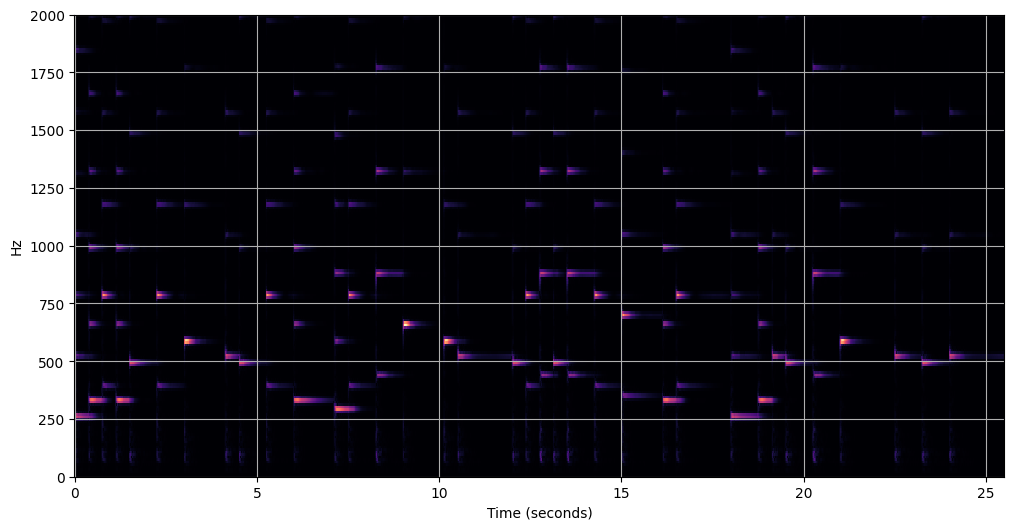

In [69]:
draw_stft(piano, ylim=(0,2000))

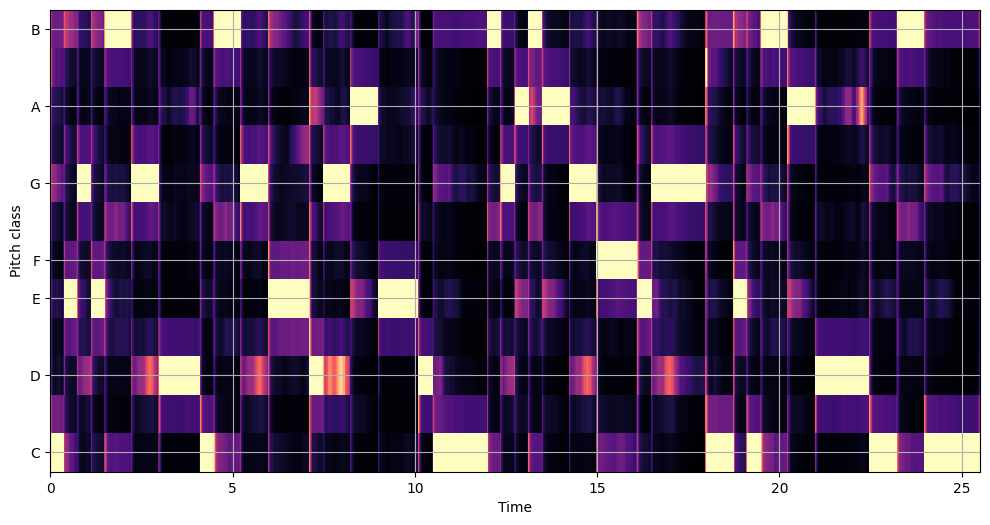

In [70]:
draw_chroma(piano, sr)